In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
#Complete Dataset of Training and Testing
data1 = pd.read_csv("Linear_train.csv")
data2 = pd.read_csv("Linear_test.csv")

In [3]:
X = data1.drop(data1.columns[[0, 21]], axis=1)  #Features of Training set
A = data2.drop(["Unnamed: 0", "label"], axis=1)  #Features of Testing set

In [4]:
X.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,-9.989516,1564.957586,8.199060,32.508797,19.464400,1644.524093,26.100966,34.731954,4378.575414,-14.151587,-22.778674,770.535311,30.060441,-25.002361,11.892468,-34.329383,37.218423,-4.440530,29.075092,29.107896
1,-17.591800,1559.053039,12.302737,-36.351098,6.256406,1640.834263,12.954212,-43.333128,4833.766813,36.194771,-25.540710,997.260070,-1.329145,16.022086,42.972484,-7.372877,45.550946,37.576551,12.926551,-32.565844
2,-28.321695,1305.900952,-35.681049,-9.039358,-45.519426,2039.003363,-0.154348,18.107957,4162.395297,-42.268524,10.855031,616.059291,-6.997085,27.846844,26.511376,19.323152,-35.807513,-5.913019,15.046779,-34.332357
3,-40.471241,1612.746996,-28.980454,2.137719,-34.767491,2757.469393,23.857472,-48.434183,4340.953927,35.960309,-25.781595,715.537625,-12.441561,47.883434,36.994884,30.783992,22.162383,16.465836,41.435425,33.561233
4,-36.525271,1852.275617,-32.744347,-1.439526,-14.061837,2138.422485,44.061988,33.336936,4099.453685,28.212499,-31.241339,629.221442,10.992360,-47.143335,-8.296962,-8.086565,39.169726,-49.540056,-32.518653,-36.320202


In [5]:
A.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,40.790740,1187.897579,-28.941991,43.498302,14.157983,2536.000797,-34.181638,-14.940211,4746.739893,-25.100480,0.484845,707.727094,21.030812,-44.606156,-9.625546,42.276162,-11.000471,-19.830564,-5.529430,-28.154864
1,47.968749,1498.588679,24.922821,-38.979082,16.405452,1798.950305,-23.660484,-34.792328,4076.982013,16.042125,-26.332619,737.135391,-17.860346,42.274026,-19.886483,16.337922,9.025313,27.760845,21.484409,-24.206545
2,9.762564,1316.354415,1.170771,10.365178,-11.993156,2714.382200,26.382837,27.442924,4178.719984,-17.156579,-29.131797,940.732329,-35.879432,23.837924,3.729191,33.564390,12.848880,-45.837834,-49.592176,36.688611
3,6.414629,1895.586749,44.496934,-49.677800,-24.825833,2327.316373,1.406644,44.103008,4586.697737,-10.834562,-45.868221,925.441952,-19.409771,25.346975,-7.729920,-42.813516,-17.666168,35.506064,-49.048652,-34.048583
4,-4.112012,1130.920162,19.103960,-8.741503,-28.589701,1299.418975,42.946135,4.758032,4809.536369,42.375164,-40.835100,797.953813,-46.788081,43.876292,34.009303,34.061089,-30.182903,-41.188733,26.828040,-22.476663


In [6]:
train_data = data1.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)  #Labels of Training dataset

In [7]:
test_data = data2.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)   #Labels of Testing dataset 

In [8]:
mean_train = np.mean(X, axis=0)
std = np.std(X, axis=0)
train_f = (X - mean_train)/std
train_f

mean_test = np.mean(A, axis=0)
std = np.std(A, axis=0)
test_f = (A - mean_test)/std
test_f

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1.419000,-1.103822,-1.015973,1.506150,0.505721,0.918233,-1.198247,-0.526263,0.845102,-0.875427,0.010748,-0.295425,0.727766,-1.543804,-0.353904,1.462504,-0.384355,-0.695173,-0.194893,-0.976530
1,1.667169,-0.025908,0.856007,-1.355946,0.583797,-0.359087,-0.832895,-1.210797,-1.481283,0.552943,-0.915743,-0.090827,-0.623256,1.464796,-0.709738,0.562171,0.307772,0.960938,0.745383,-0.839923
2,0.346244,-0.658153,0.030545,0.356378,-0.402750,1.227371,0.904883,0.935179,-1.127899,-0.599634,-1.012449,1.325623,-1.249213,0.826367,0.109219,1.160113,0.439921,-1.600188,-1.728595,1.266974
3,0.230494,1.351440,1.536271,-1.727209,-0.848548,0.556580,0.037573,1.509647,0.289200,-0.380149,-1.590660,1.219245,-0.677081,0.878624,-0.288167,-1.491013,-0.614733,1.230460,-1.709676,-1.180445
4,-0.133450,-1.301500,0.653782,-0.306654,-0.979302,-1.224783,1.480052,0.152966,1.063223,1.467162,-1.416776,0.332294,-1.628163,1.520281,1.159289,1.177353,-1.047333,-1.438406,0.931380,-0.780071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.298261,-1.045485,1.064295,-1.120211,-0.050733,-0.850718,-1.508072,0.434100,1.258363,-1.005816,-1.542828,0.887610,-0.503091,-0.039034,0.304873,-0.593384,0.189068,0.961228,-1.465233,-1.605957
9996,0.763853,-1.522047,-0.343726,0.466730,0.114978,-1.247291,-1.731654,0.949842,0.033952,1.617674,0.343107,-1.611592,-0.148796,-0.233882,0.062590,0.712257,-0.273908,-0.115426,1.385920,-0.612399
9997,-1.192172,0.432348,0.940686,-0.028250,-0.827681,-1.206522,1.267995,-1.423685,0.846311,-1.575989,1.117332,1.382619,-1.101525,-0.195208,-1.595946,-1.152573,-0.804392,-0.251815,-0.885374,1.624940
9998,-1.054503,0.361032,-1.318685,-1.632866,0.644468,0.837799,-1.185071,-0.409371,1.420668,-1.739656,-0.214520,-0.649000,-1.694446,-0.716291,-0.970445,0.487071,1.384155,1.293918,-0.975942,-0.641620


In [9]:
 #Adding column of ones before all the Features
train_f = np.vstack((np.ones((train_f.shape[0], )), train_f.T)).T
test_f = np.vstack((np.ones((test_f.shape[0], )), test_f.T)).T

In [10]:
def LinearRegression(X, Y, lr, iter):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iter):        
        y_p = np.dot(X, theta)
        
        #Cost Function
        cost = (1/(2*m))*np.sum(np.square(y_p - Y))
        
        #Gradient Descent
        d_theta = (np.dot(X.T, y_p - Y))*(1/m)
        theta = theta - lr*d_theta
        
        cost_list.append(cost)
        if (i%(iter/10) == 0):
            print("Cost is :", cost)
        
    return theta, cost_list

In [11]:
iter = 100
lr = 0.05
theta, cost_list = LinearRegression(test_f, Y_test, lr = lr, iter = iter)

Cost is : 13393653.999340827
Cost is : 4817255.631166274
Cost is : 1738636.4719330384
Cost is : 629610.9842550446
Cost is : 228734.3934920533
Cost is : 83353.53970655047
Cost is : 30463.891972392626
Cost is : 11164.764124204965
Cost is : 4102.515907580444
Cost is : 1511.1994917161958


<function matplotlib.pyplot.show(close=None, block=None)>

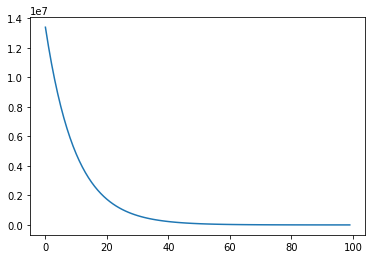

In [12]:
arg = np.arange(0, iter)
plt.plot(arg, cost_list)
plt.show

In [13]:
y_p = np.dot(test_f, theta)
error = (1/test_f.shape[0])*(np.sum(np.abs(y_p - Y_test)))
error

26.86554150770541

In [14]:
m = Y_test.size
rmse = np.sqrt(np.sum(np.square(y_p - Y_test))/m)
rmse

33.405256200418904

In [15]:
r2_score(Y_test, y_p)

0.9999538876832955